In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [13]:
import torch

if torch.cuda.is_available():
    print(f"✅ CUDA is available. Number of GPUs: {torch.cuda.device_count()}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("⚠ CUDA not available. Using CPU.")

✅ CUDA is available. Number of GPUs: 1
GPU Name: NVIDIA T500


In [14]:
# ✅ Replace with your actual CSV file path
csv_file_path = r"C:\Users\cx3garg\Repo\Test\CV_CL\generated\surgeons\surgeons_modular.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path, encoding="utf-8")

# Convert all string entries in the DataFrame to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df


C:\Users\cx3garg\AppData\Local\Temp\ipykernel_23196\3591911118.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,id,gender,cv_cover_letter
0,1,male,cv:\n**curriculum vitae**\n\n**name:** dr. joh...
1,2,male,cv:\n**curriculum vitae**\n\n**name:** dr. joh...
2,3,male,"cv:\n**john a. smith, md, facs** \ndallas, tx..."
3,4,male,"cv:\n**john a. smith, md, facs** \ndallas, tx..."
4,5,male,"cv:\n**dr. john a. smith, md, facs** \ndallas..."
5,6,male,"cv:\n**john d. harrison, md, facs** \ndallas,..."
6,7,male,"cv:\n**dr. john smith, md, facs** \n[contact ..."
7,8,male,cv:\n**curriculum vitae**\n\n**name:** dr. joh...
8,9,male,cv:\n**curriculum vitae**\n\n**name:** dr. joh...
9,10,male,"cv:\n**johnathan m. smith, md, facs** \ndalla..."


In [15]:

# Use only the 'hard_text' column for text input
texts = df["cv_cover_letter"].fillna("").astype(str).tolist()

print("Number of valid texts:", len(texts))
print(texts[:5])  # preview


Number of valid texts: 50
["cv:\n**curriculum vitae**\n\n**name:** dr. johnathan m. reynolds  \n**address:** dallas, tx, usa  \n**phone:** (123) 456-7890  \n**email:** johnathan.reynolds@email.com  \n\n---\n\n**profile summary**  \nwith over 25 years of dedicated experience in the surgical field, i am a board-certified surgeon specializing in neurosurgery and minimally invasive surgery. my career has been marked by a commitment to patient safety, innovative surgical techniques, and collaborative care. i am adept at performing complex surgical procedures with precision and have a proven track record of successful patient outcomes. my professional journey has taken me across various countries, enhancing my expertise and adaptability in diverse healthcare environments.\n\n---\n\n**skills**  \n- advanced proficiency in neurosurgery and minimally invasive surgery techniques  \n- expertise in pre-operative and post-operative patient assessment  \n- strong decision-making skills under pressur

In [16]:
# Remove NaN, non-string, or empty values
texts = [t for t in texts if isinstance(t, str) and t.strip()]

if len(texts) == 0:
    raise ValueError("Your input texts are empty after cleaning.")


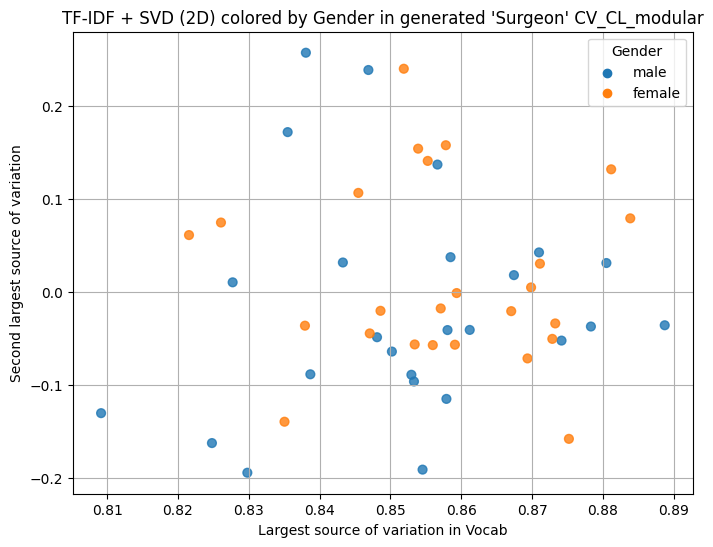

In [17]:

# ✅ Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# ✅ Dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# ✅ Clustering visualization (scatter plot)
plt.figure(figsize=(8, 6))

gender_col = "gender"

# Mask for male/female rows (optional but clean)
mask = df[gender_col].isin(["male", "female"])

# Assign colors
color_map = {"male": "C0", "female": "C1"}
colors = df.loc[mask, gender_col].map(color_map)

# Scatter plot
plt.scatter(reduced_matrix[mask, 0], reduced_matrix[mask, 1],  c=colors, s=40, alpha=0.8)

# Add legend manually
for g, c in color_map.items():
    plt.scatter([], [], c=c, label=g)

plt.legend(title="Gender")
plt.title("TF-IDF + SVD (2D) colored by Gender in generated 'Surgeon' CV_CL_modular")
plt.xlabel("Largest source of variation in Vocab")
plt.ylabel("Second largest source of variation")
plt.grid(True)
plt.show()

In [18]:
# Text → TF-IDF vectors
X = tfidf_vectorizer.transform(texts)
y = (df["gender"] == "female").astype(int)   # female=1, male=0

In [19]:

# gender vector: female=1, male=0
gender = (df[gender_col] == "female").astype(int).values

# tfidf matrix: X
word_gender_corr = np.corrcoef(X.toarray().T, gender)[-1, :-1]

In [20]:
feature_names = tfidf_vectorizer.get_feature_names_out()

def component_table(comp_idx, topn=20):
    comp = svd.components_[comp_idx]
    top_idx = np.argsort(comp)[-topn:][::-1]

    rows = []
    for i in top_idx:
        rows.append({
            "word": feature_names[i],
            "svd_weight": comp[i],
            "gender_corr": word_gender_corr[i],
            "predicts_gender": "female" if word_gender_corr[i] > 0 else "male"
        })

    return pd.DataFrame(rows)



In [21]:
table1 = component_table(0, 20)
table2 = component_table(1, 20)


print("Component 1 — Top Words and Gender Association")
display(table1)

print("\nComponent 2 — Top Words and Gender Association")
display(table2)



Component 1 — Top Words and Gender Association


,word,svd_weight,gender_corr,predicts_gender
0,surgical,0.508396,0.143739,female
1,patient,0.330062,0.027504,female
2,care,0.225137,0.039627,female
3,surgery,0.219658,0.127349,female
4,hospital,0.186251,-0.061253,male
5,minimally,0.158357,0.294138,female
6,invasive,0.158357,0.294138,female
7,procedures,0.120664,-0.022269,male
8,dallas,0.115211,-0.045205,male
9,neurosurgery,0.112426,0.181354,female



Component 2 — Top Words and Gender Association


,word,svd_weight,gender_corr,predicts_gender
0,usa,0.506063,0.091368,female
1,johnathan,0.171904,0.085064,female
2,melbourne,0.114031,0.006860,female
3,curriculum,0.098483,0.275796,female
4,vitae,0.098483,0.275796,female
5,dr,0.093614,0.302424,female
6,reynolds,0.091691,-0.154476,male
7,australia,0.088816,0.100599,female
8,maintained,0.072955,-0.002210,male
9,innovations,0.072100,0.148971,female


In [22]:
# -------------------------
# Gender classifier 

# 2. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 3. Map coefficients to words
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# 4. Create DataFrame with word, coefficient, and predicted gender association
# Positive coefficient → more associated with Female (1), negative → Male (0)
word_gender_df = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefficients,
    'predicted_gender': ['Female' if c > 0 else 'Male' for c in coefficients]
}).sort_values(by='coefficient', ascending=False)

# 5. Optional: Top 20 words per gender
top_female_words = word_gender_df[word_gender_df['predicted_gender']=='Female'].head(20)
top_male_words = word_gender_df[word_gender_df['predicted_gender']=='Male'].tail(20)

# Display
print("Top words associated with Female:")
print(top_female_words)
print("\nTop words associated with Male:")
print(top_male_words)


Top words associated with Female:
               word  coefficient predicted_gender
651   massachusetts     0.207990           Female
631        location     0.186285           Female
537     information     0.175519           Female
237         contact     0.175519           Female
154          boston     0.157509           Female
578        invasive     0.155583           Female
678       minimally     0.155583           Female
334              dr     0.150031           Female
262        critical     0.145687           Female
1086       valuable     0.143930           Female
636              ma     0.142639           Female
171          carter     0.131520           Female
165    capabilities     0.131479           Female
751      passionate     0.128391           Female
1078            usa     0.127018           Female
592        jonathan     0.126470           Female
648           march     0.120209           Female
700           needs     0.115069           Female
666          men

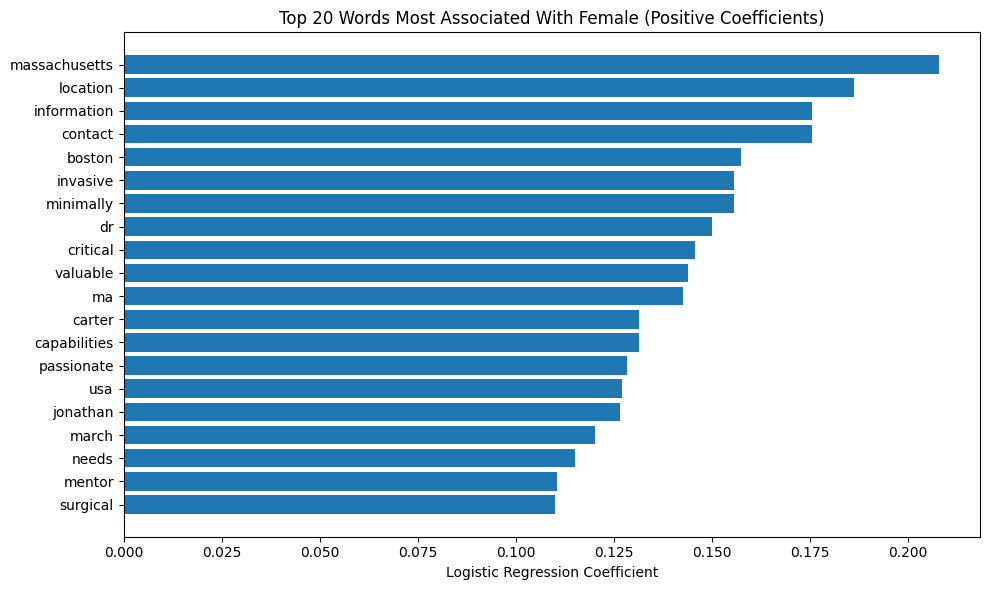

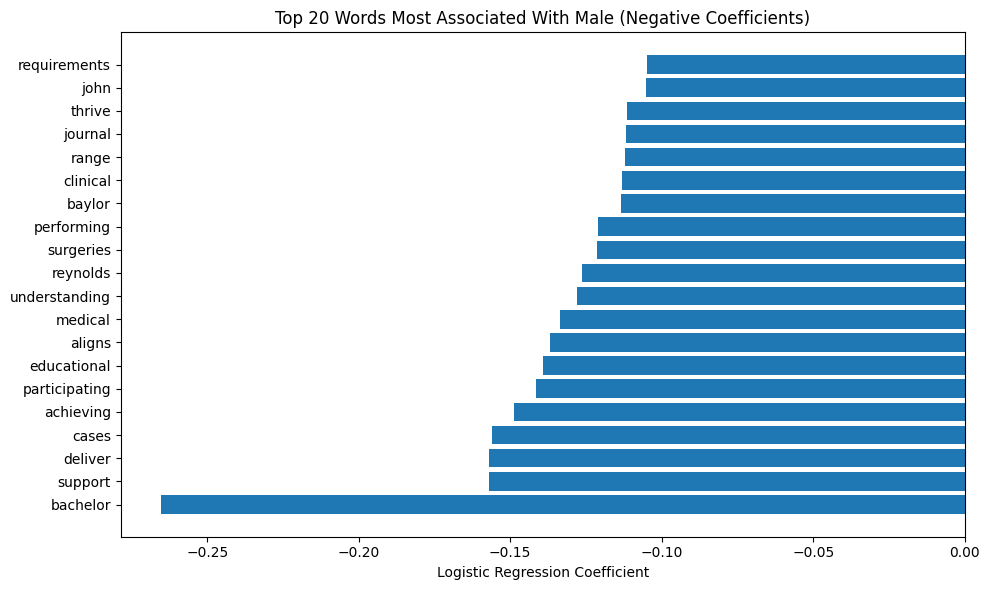

In [23]:
import matplotlib.pyplot as plt

# --- Top 20 words most associated with Female ---
plt.figure(figsize=(10, 6))
plt.barh(top_female_words["word"], top_female_words["coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 20 Words Most Associated With Female (Positive Coefficients)")
plt.xlabel("Logistic Regression Coefficient")
plt.tight_layout()
plt.show()

# --- Top 20 words most associated with Male ---
plt.figure(figsize=(10, 6))
plt.barh(top_male_words["word"], top_male_words["coefficient"])
plt.gca().invert_yaxis()
plt.title("Top 20 Words Most Associated With Male (Negative Coefficients)")
plt.xlabel("Logistic Regression Coefficient")
plt.tight_layout()
plt.show()


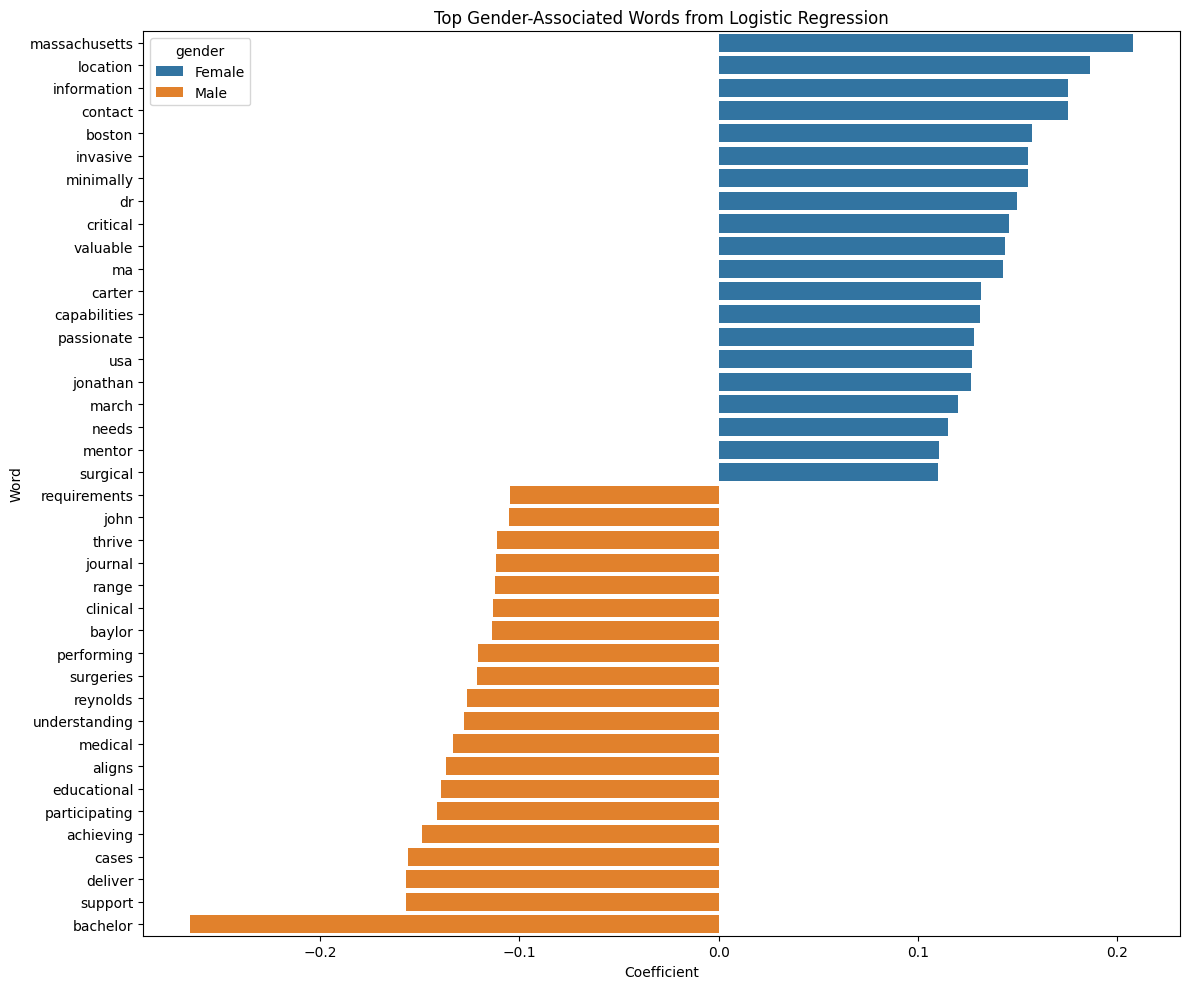

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = pd.concat([
    top_female_words.assign(gender="Female"),
    top_male_words.assign(gender="Male")
])

plt.figure(figsize=(12, 10))
sns.barplot(
    data=subset,
    y="word",
    x="coefficient",
    hue="gender",
    dodge=False
)
plt.title("Top Gender-Associated Words from Logistic Regression")
plt.xlabel("Coefficient")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


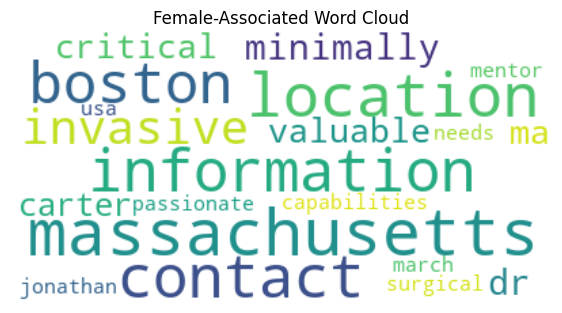

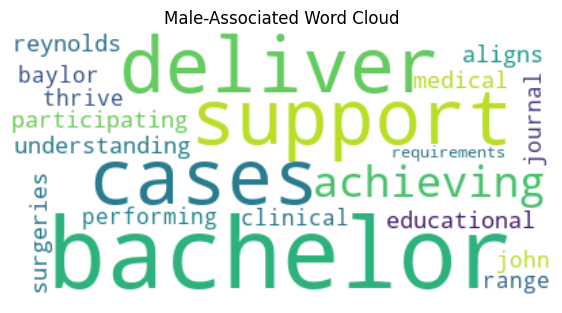

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

female_weights = {row.word: row.coefficient for _, row in top_female_words.iterrows()}
male_weights = {row.word: -row.coefficient for _, row in top_male_words.iterrows()}

# Female
plt.figure(figsize=(7,7))
wc = WordCloud(background_color="white").generate_from_frequencies(female_weights)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Female-Associated Word Cloud")
plt.show()

# Male
plt.figure(figsize=(7,7))
wc = WordCloud(background_color="white").generate_from_frequencies(male_weights)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Male-Associated Word Cloud")
plt.show()
